# Import Data & Liblary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
# Konfigurasi visualisasi
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load data
df = pd.read_csv("/content/student-scores.csv")

# Tampilkan 5 data teratas
print(df.head())


   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1         

# EDA

## Cek Missing Value dan Duplikasi

In [2]:
print("5 Data Teratas:\n", df.head())
print("\nInformasi Dataset:")
print(df.info())
print("\nMissing Values per Kolom:\n", df.isnull().sum())
print(f"\nJumlah Duplikasi: {df.duplicated().sum()}")

5 Data Teratas:
    id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73            

Dapat kita bahwa tidak ada missing value dan dupikasi sehingga tidak diperlukan penanganan khusus pada tahap data preperation.

## Distribusi Distribusi Kategori

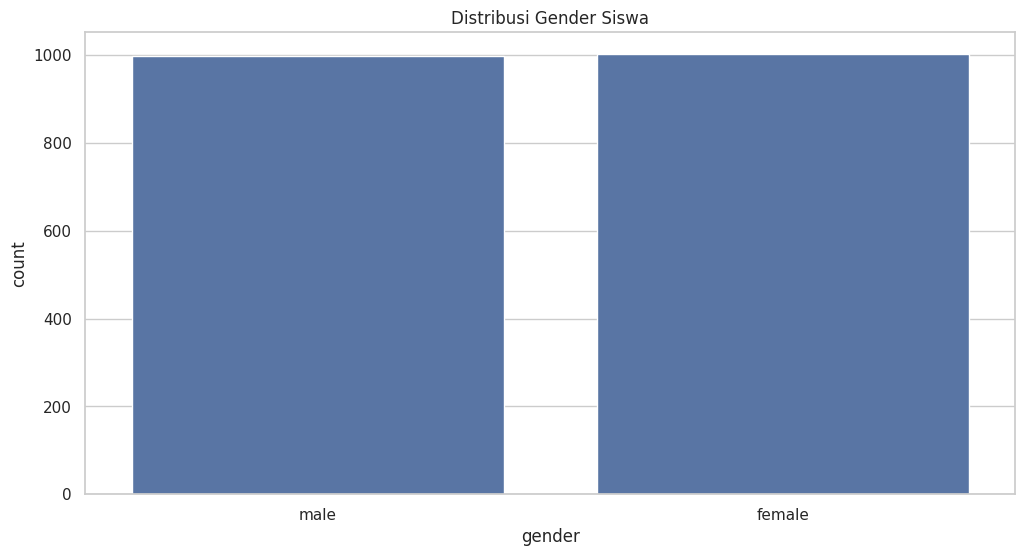

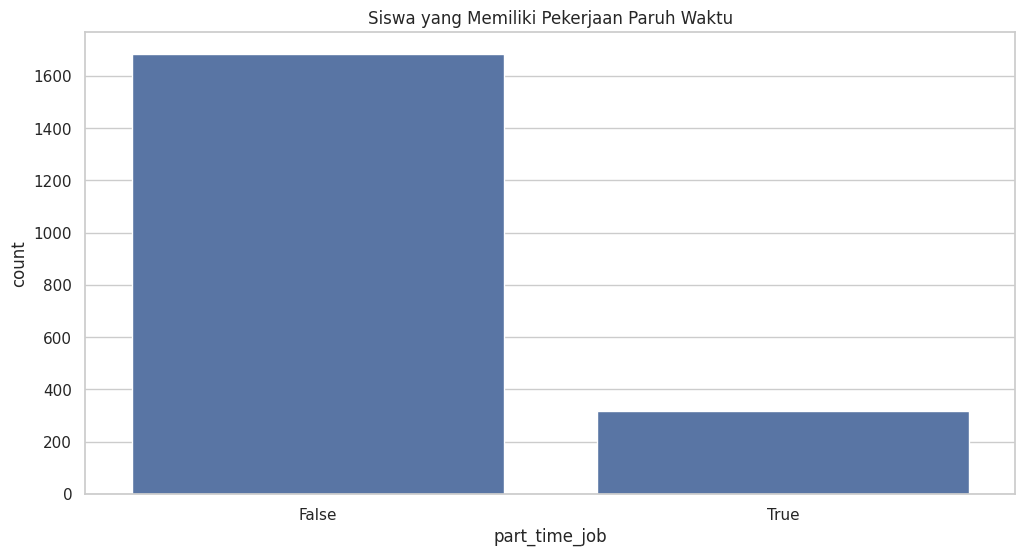

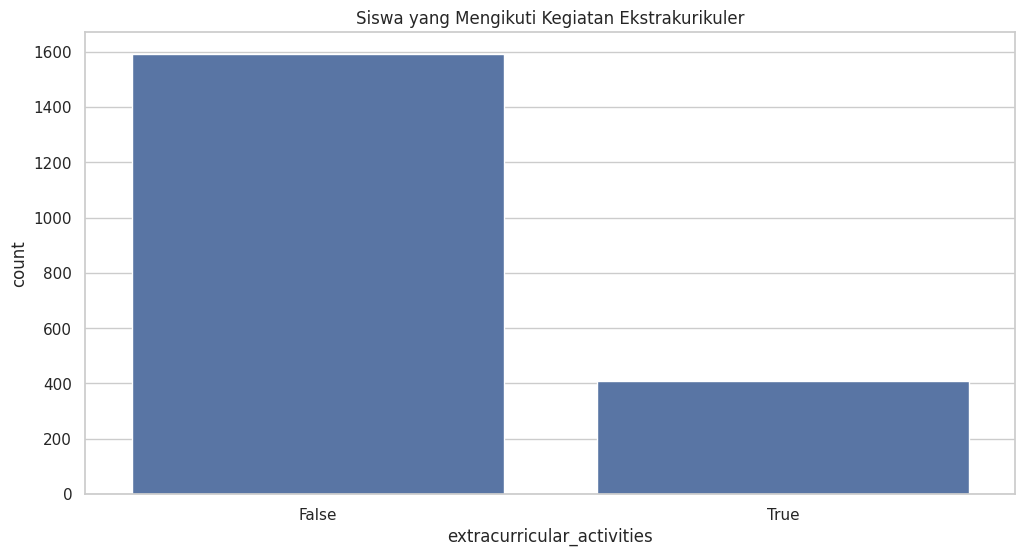

In [3]:
# Distribusi gender
sns.countplot(x='gender', data=df)
plt.title('Distribusi Gender Siswa')
plt.show()

# Distribusi pekerjaan paruh waktu
sns.countplot(x='part_time_job', data=df)
plt.title('Siswa yang Memiliki Pekerjaan Paruh Waktu')
plt.show()

# Distribusi aktivitas ekstrakurikuler
sns.countplot(x='extracurricular_activities', data=df)
plt.title('Siswa yang Mengikuti Kegiatan Ekstrakurikuler')
plt.show()


Pekerjaan Paruh Waktu:

- Sebagian besar siswa tidak memiliki pekerjaan paruh waktu.

- Hanya sebagian kecil yang bekerja sambil sekolah.

Aktivitas Ekstrakurikuler:

- Mayoritas siswa tidak mengikuti aktivitas ekstrakurikuler.

- Sekitar 20–25% siswa aktif dalam kegiatan ekstrakurikuler.

In [4]:
print(df['career_aspiration'].unique())
print(df['career_aspiration'].value_counts())


['Lawyer' 'Doctor' 'Government Officer' 'Artist' 'Unknown'
 'Software Engineer' 'Teacher' 'Business Owner' 'Scientist' 'Banker'
 'Writer' 'Accountant' 'Designer' 'Construction Engineer' 'Game Developer'
 'Stock Investor' 'Real Estate Developer']
career_aspiration
Software Engineer        315
Business Owner           309
Unknown                  223
Banker                   169
Lawyer                   138
Accountant               126
Doctor                   119
Real Estate Developer     83
Stock Investor            73
Construction Engineer     68
Artist                    67
Game Developer            63
Government Officer        61
Teacher                   59
Designer                  56
Scientist                 39
Writer                    32
Name: count, dtype: int64


## Distribusi Nilai Akademik

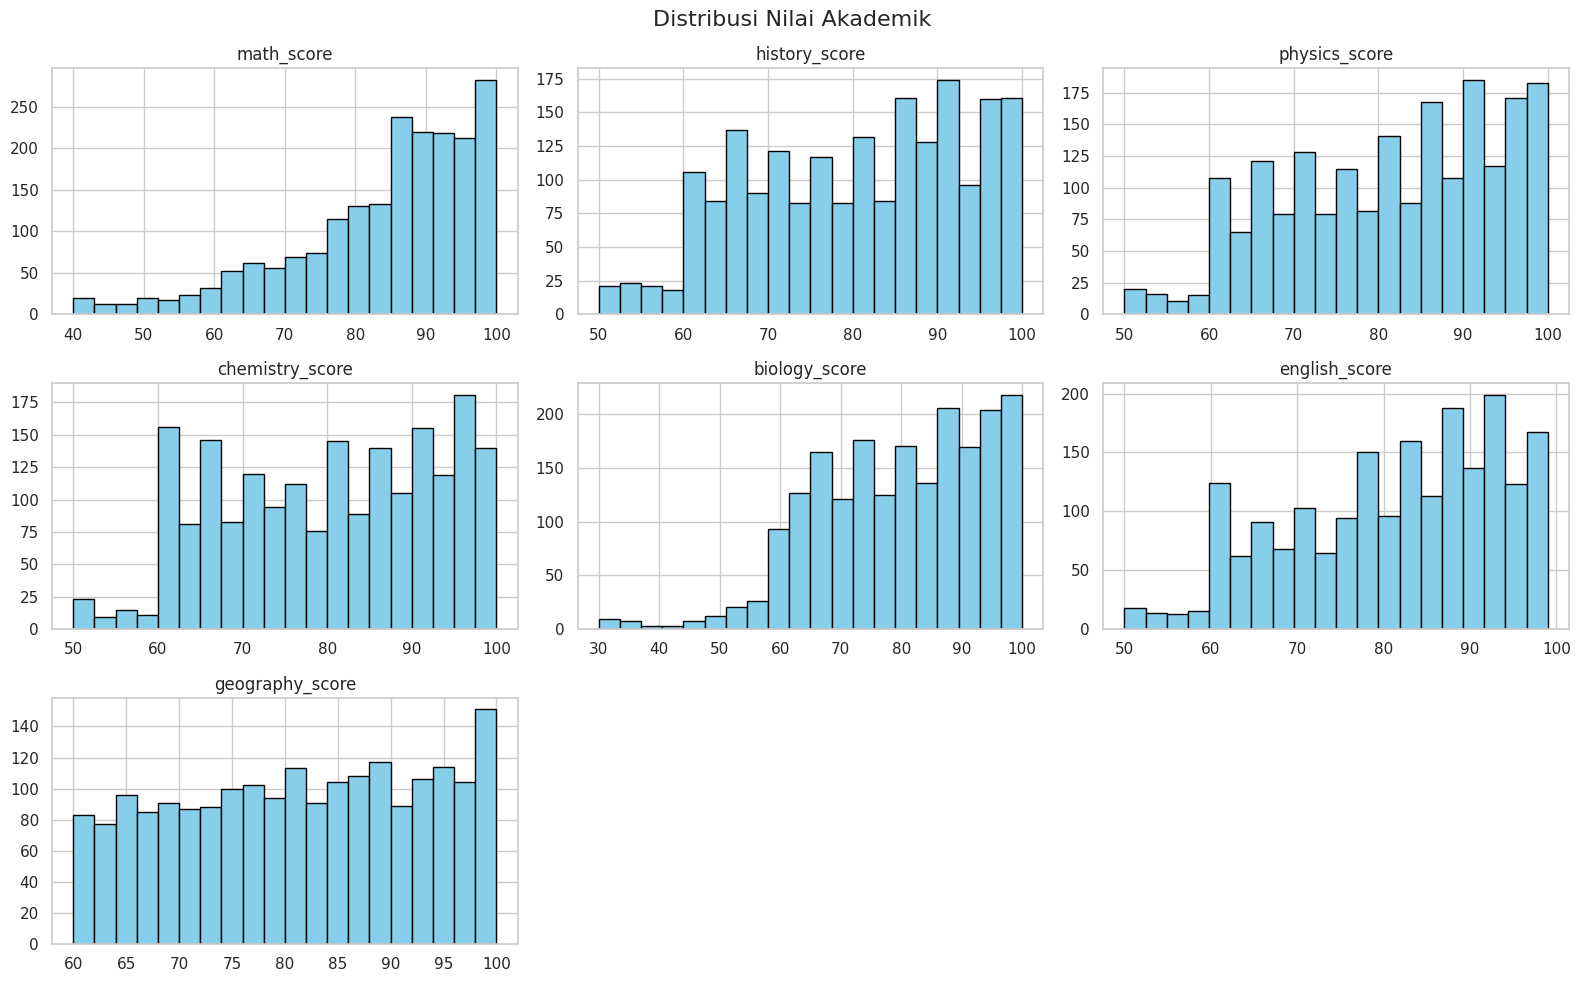

In [5]:
score_columns = [
    "math_score", "history_score", "physics_score",
    "chemistry_score", "biology_score", "english_score",
    "geography_score"
]

# Plot distribusi nilai
df[score_columns].hist(bins=20, figsize=(16, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Nilai Akademik", fontsize=16)
plt.tight_layout()
plt.show()


Insight dari Distribusi Nilai Akademik:
- math_score, biology_score, dan english_score cenderung condong ke skor tinggi.
- chemistry_score dan geography_score memiliki sebaran lebih merata.
- Hampir semua mata pelajaran menunjukkan positively skewed distribution(mayoritas skor tinggi).
- Tidak ada outlier ekstrem yang mencolok secara visual.

## Outlier Detection

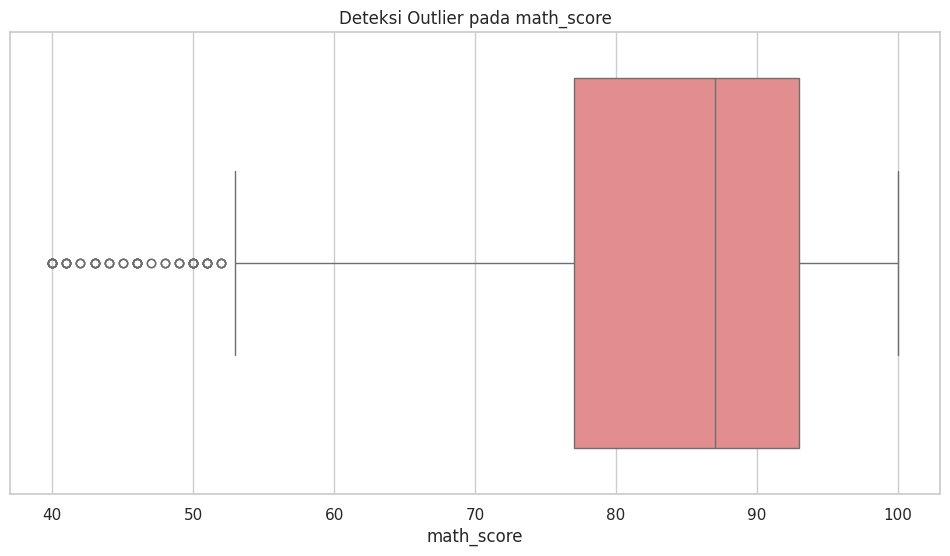

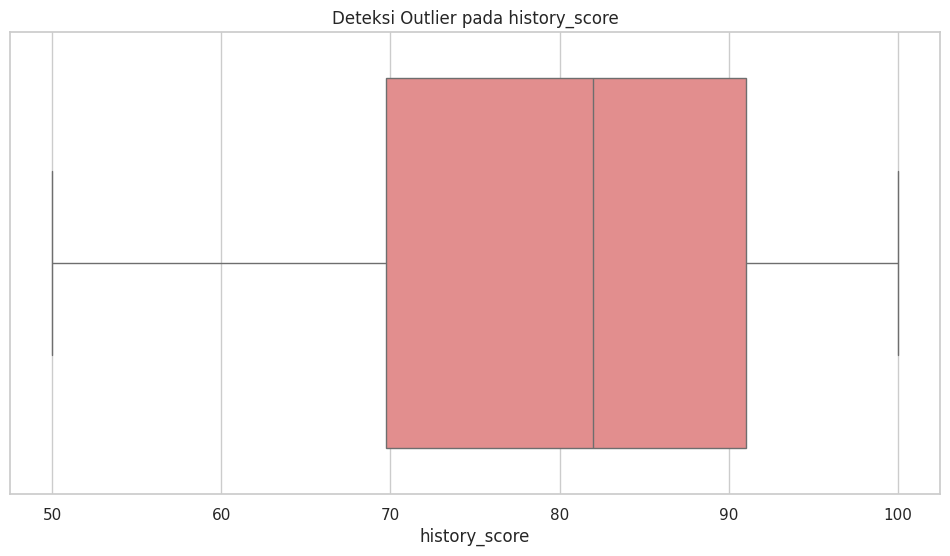

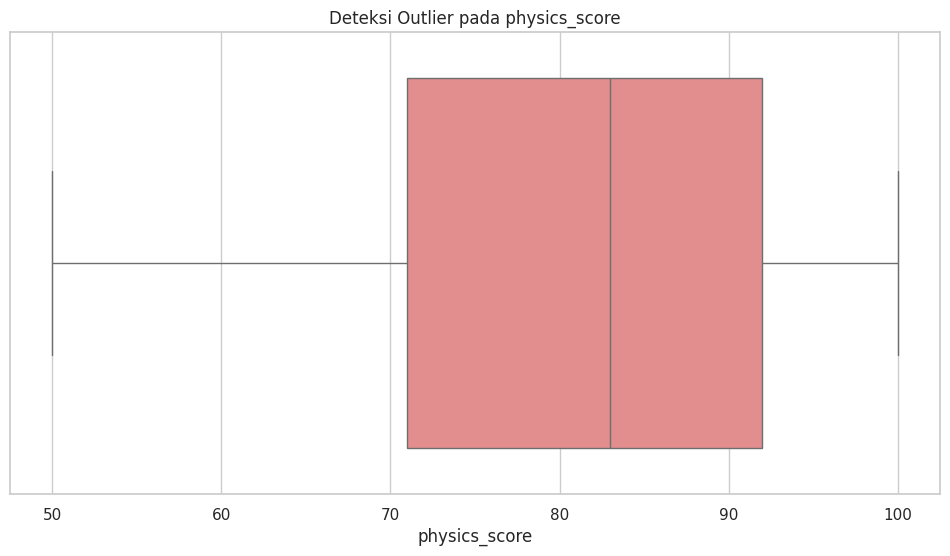

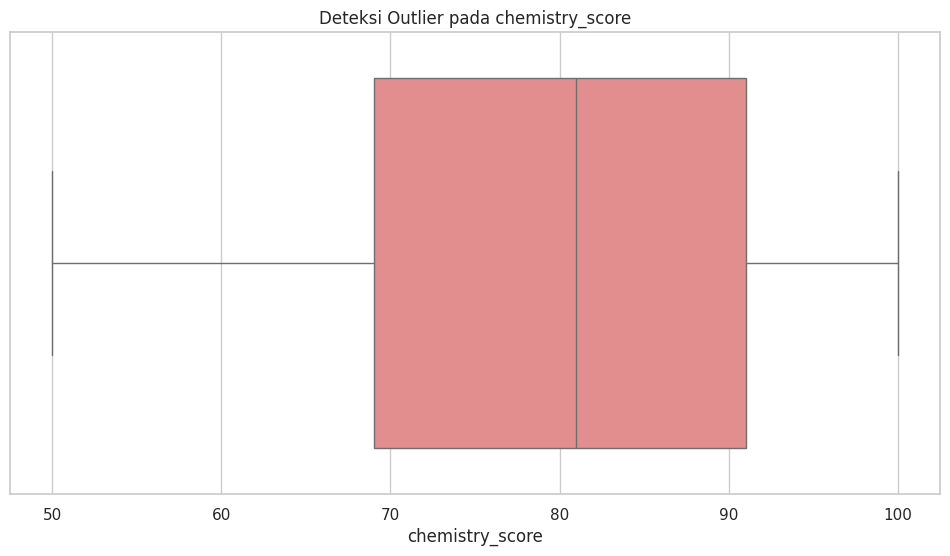

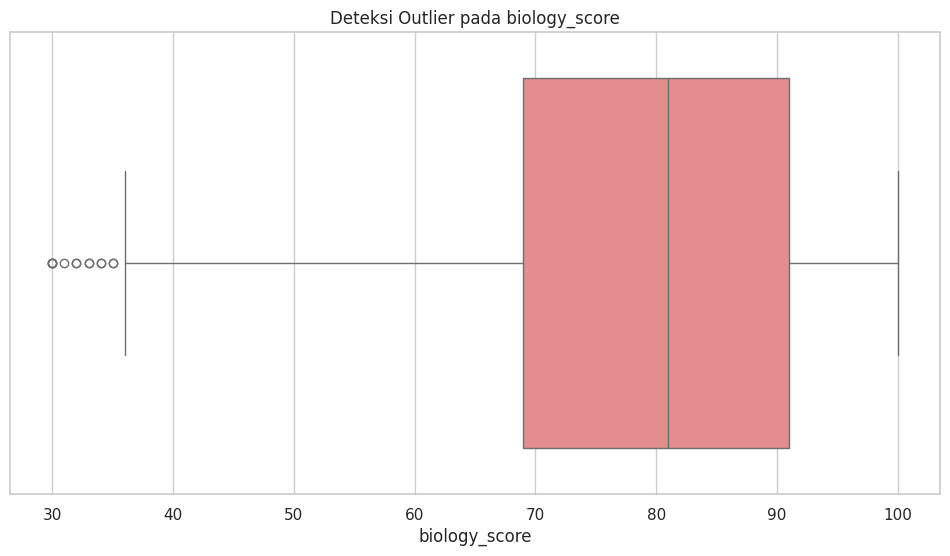

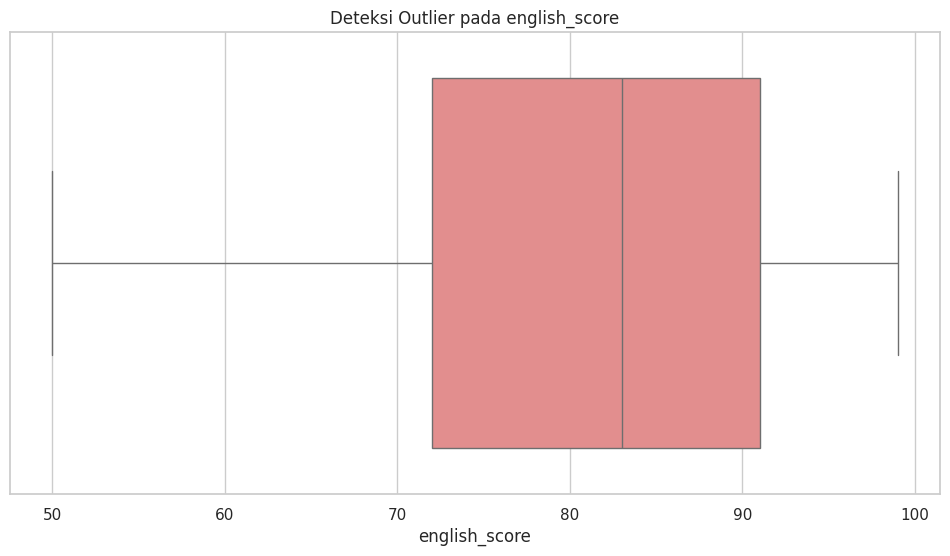

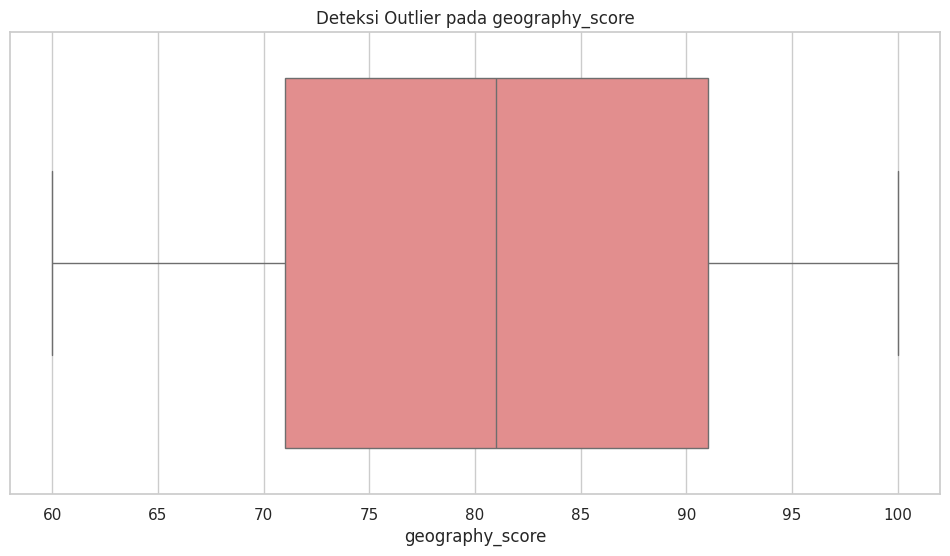

In [6]:
# Deteksi outlier dengan boxplot
for col in score_columns:
    sns.boxplot(x=df[col], color="lightcoral")
    plt.title(f'Deteksi Outlier pada {col}')
    plt.show()

Beberapa fitur numerik, seperti **math_score** dan **biology_score**, memiliki outlier. Penanganan dilakukan dengan metode IQR (Interquartile Range) untuk menetralkan efek nilai ekstrem pada perhitungan similaritas.

# Data Preparation

## Menangani Missing Values dan Duplikasi

Karena dari hasil EDA, dataset tidak memiliki nilai kosong maupun duplikasi. Dengan demikian, tahap ini dapat dilewati.

## Menangani Outlier dengan IQR

Menggunakan metode IQR untuk menghapus atau memperbaiki nilai outlier pada fitur numerik:

In [7]:
# Fungsi untuk menghapus outlier dengan metode IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Bersihkan outlier
df_cleaned = remove_outliers_iqr(df.copy(), score_columns)

In [8]:
# Bersihkan outlier
print(f"Jumlah data sebelum outlier removal: {len(df)}")
df_cleaned = remove_outliers_iqr(df.copy(), score_columns)
print(f"Jumlah data setelah outlier removal: {len(df_cleaned)}")

Jumlah data sebelum outlier removal: 2000
Jumlah data setelah outlier removal: 1913


## Mapping karier ke bidang studi

In [9]:
# Mapping karier ke bidang studi
career_to_field = {
    'Software Engineer': 'Computer Science',
    'Game Developer': 'Computer Science',
    'Business Owner': 'Business',
    'Stock Investor': 'Business',
    'Accountant': 'Business',
    'Banker': 'Business',
    'Real Estate Developer': 'Business',
    'Lawyer': 'Law',
    'Government Officer': 'Law',
    'Doctor': 'Medical Science',
    'Construction Engineer': 'Engineering',
    'Scientist': 'Natural Sciences',
    'Teacher': 'Education',
    'Artist': 'Arts',
    'Designer': 'Arts',
    'Writer': 'Arts',
    'Unknown': 'Undecided'
}

# Tambahkan kolom bidang studi
df_cleaned['study_field'] = df_cleaned['career_aspiration'].map(career_to_field)

# Hapus entri dengan bidang studi yang tidak diketahui
df_cleaned = df_cleaned[df_cleaned['study_field'] != 'Undecided']

## Normalisasi skor akademik dan jam belajar

In [10]:
# Normalisasi skor akademik dan jam belajar
scaler_academic = MinMaxScaler()
scaler_study_hours = MinMaxScaler()

df_scaled = df_cleaned.copy()
df_scaled[score_columns] = scaler_academic.fit_transform(df_scaled[score_columns])
df_scaled['weekly_self_study_hours_norm'] = scaler_study_hours.fit_transform(
    df_scaled[['weekly_self_study_hours']]
).flatten()


## Binary Encoding untuk Fitur Aktivitas

In [11]:
df_scaled['has_extracurricular'] = df_scaled['extracurricular_activities'].astype(int)
df_scaled['has_part_time_job'] = df_scaled['part_time_job'].astype(int)

# Tambahkan nama lengkap dan ID untuk identifikasi
df_scaled['name'] = df_scaled['first_name'] + ' ' + df_scaled['last_name']
if 'id' not in df_scaled.columns:
    df_scaled['id'] = range(1, len(df_scaled) + 1)

## Finalisasi Feature Vector yang digunakan

In [12]:
# Semua kolom fitur yang akan digunakan
feature_columns = score_columns + [
    'weekly_self_study_hours_norm',
    'has_extracurricular',
    'has_part_time_job'
]

print("\n=== FITUR YANG DIGUNAKAN ===")
print("Fitur akademik:", score_columns)
print("Fitur tambahan:", ['weekly_self_study_hours_norm', 'has_extracurricular', 'has_part_time_job'])
print("Total fitur:", len(feature_columns))


=== FITUR YANG DIGUNAKAN ===
Fitur akademik: ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']
Fitur tambahan: ['weekly_self_study_hours_norm', 'has_extracurricular', 'has_part_time_job']
Total fitur: 10


# Modeling (Content-Based Filtering)

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

# Salin kolom 'name' dan 'career_aspiration' ke df_scaled agar bisa digunakan di akhir
df_scaled['first_name'] = df['first_name']
df_scaled['career_aspiration'] = df['career_aspiration']

# 1. PROFIL DATA-DRIVEN
data_driven_profiles = df_scaled.groupby('study_field')[feature_columns].mean()

# 2. PROFIL MANUAL (RULE-BASED)
manual_profiles_dict = {
    'Medical Science': [0.85, 0.6, 0.8, 0.9, 0.95, 0.75, 0.65, 0.8, 0.7, 0.3],
    'Engineering': [0.9, 0.5, 0.95, 0.85, 0.6, 0.7, 0.6, 0.75, 0.6, 0.4],
    'Computer Science': [0.9, 0.4, 0.8, 0.6, 0.5, 0.75, 0.45, 0.7, 0.5, 0.6],
    'Business': [0.75, 0.7, 0.5, 0.5, 0.4, 0.8, 0.75, 0.6, 0.8, 0.7],
    'Law': [0.65, 0.85, 0.5, 0.4, 0.4, 0.9, 0.8, 0.75, 0.7, 0.5],
    'Natural Sciences': [0.8, 0.6, 0.85, 0.85, 0.9, 0.7, 0.7, 0.8, 0.6, 0.3],
    'Education': [0.7, 0.75, 0.6, 0.6, 0.6, 0.85, 0.7, 0.65, 0.8, 0.4],
    'Arts': [0.5, 0.7, 0.4, 0.4, 0.4, 0.8, 0.6, 0.5, 0.9, 0.6]
}
manual_profiles = pd.DataFrame(manual_profiles_dict, index=feature_columns).T

# 3. PROFIL ASPIRASI KARIER
ohe = OneHotEncoder(sparse_output=False)
career_encoded = ohe.fit_transform(df_scaled[['career_aspiration']])
career_encoded_df = pd.DataFrame(career_encoded, columns=ohe.get_feature_names_out(['career_aspiration']))
career_encoded_df['study_field'] = df_scaled['study_field'].values
career_profiles = career_encoded_df.groupby('study_field').mean()

print("\n=== PERHITUNGAN SIMILARITY ===")

# 4. Vektor siswa & profil
student_vectors = df_scaled[feature_columns].values
academic_only_vectors = df_scaled[score_columns].values
academic_only_profiles = df_scaled.groupby('study_field')[score_columns].mean()

# 5. Perhitungan similarity
academic_similarity = cosine_similarity(academic_only_vectors, academic_only_profiles.values)
data_similarity = cosine_similarity(student_vectors, data_driven_profiles.values)
manual_similarity = cosine_similarity(student_vectors, manual_profiles.values)
career_similarity = cosine_similarity(career_encoded, career_profiles.values)

# 6. Hybrid similarity
hybrid_similarity = (0.4 * data_similarity +
                     0.3 * career_similarity +
                     0.3 * manual_similarity)

# 7. Pastikan kolom sama untuk semua
all_fields = sorted(list(set(data_driven_profiles.index) |
                         set(manual_profiles.index) |
                         set(career_profiles.index)))
academic_similarity_df = pd.DataFrame(academic_similarity, columns=academic_only_profiles.index)
data_similarity_df = pd.DataFrame(data_similarity, columns=data_driven_profiles.index)
manual_similarity_df = pd.DataFrame(manual_similarity, columns=manual_profiles.index)
career_similarity_df = pd.DataFrame(career_similarity, columns=career_profiles.index)
hybrid_similarity_df = pd.DataFrame(hybrid_similarity, columns=all_fields)

print("Similarity matrices berhasil dibuat!")

# 8. Fungsi untuk rekomendasi
def get_top_n_recommendations(row, n=3):
    if isinstance(row, pd.Series):
        return sorted([(field, round(score, 4)) for field, score in row.items()
                       if not pd.isna(score)], key=lambda x: x[1], reverse=True)[:n]
    return []

# 9. Simpan hasil top-N
df_scaled['academic_only_recommendations'] = academic_similarity_df.apply(get_top_n_recommendations, axis=1)
df_scaled['data_driven_recommendations'] = data_similarity_df.apply(get_top_n_recommendations, axis=1)
df_scaled['manual_recommendations'] = manual_similarity_df.apply(get_top_n_recommendations, axis=1)
df_scaled['top_recommendations'] = hybrid_similarity_df.apply(get_top_n_recommendations, axis=1)

# 10. Primary (top-1) recommendation
df_scaled['academic_only_recommendation'] = df_scaled['academic_only_recommendations'].apply(
    lambda x: x[0][0] if isinstance(x, list) and len(x) > 0 else None
)
df_scaled['primary_recommendation'] = df_scaled['top_recommendations'].apply(
    lambda x: x[0][0] if isinstance(x, list) and len(x) > 0 else None
)

print("Rekomendasi berhasil dibuat!")

# 11. Fungsi untuk menampilkan rekomendasi lengkap
def print_top_n_recommendations_text(df, column_name, student_indices):
    print(f"\n=== {column_name.replace('_', ' ').upper()} ===")
    for idx in student_indices:
        student_name = df.loc[idx, 'name']
        career_asp = df.loc[idx, 'career_aspiration']
        print(f"\nSiswa ke-{idx} | Nama: {student_name} | Career Aspiration: {career_asp}")
        recs = df.loc[idx, column_name]
        if isinstance(recs, list) and len(recs) > 0:
            for rank, (field, score) in enumerate(recs, 1):
                print(f"  {rank}. {field:<20} (Similarity: {score:.4f})")
        else:
            print("  Tidak ada rekomendasi.")

# 12. Menampilkan rekomendasi untuk sejumlah siswa
n_display = 5  # Misalnya ingin menampilkan 5 siswa pertama
student_indices_to_display = df_scaled.index[:n_display].tolist()

print_top_n_recommendations_text(df_scaled, 'academic_only_recommendations', student_indices_to_display)
print_top_n_recommendations_text(df_scaled, 'data_driven_recommendations', student_indices_to_display)
print_top_n_recommendations_text(df_scaled, 'manual_recommendations', student_indices_to_display)
print_top_n_recommendations_text(df_scaled, 'top_recommendations', student_indices_to_display)



=== PERHITUNGAN SIMILARITY ===
Similarity matrices berhasil dibuat!
Rekomendasi berhasil dibuat!

=== ACADEMIC ONLY RECOMMENDATIONS ===

Siswa ke-0 | Nama: Paul Casey | Career Aspiration: Lawyer
  1. Natural Sciences     (Similarity: 0.9614)
  2. Medical Science      (Similarity: 0.9569)
  3. Education            (Similarity: 0.9531)

Siswa ke-1 | Nama: Danielle Sandoval | Career Aspiration: Doctor
  1. Natural Sciences     (Similarity: 0.9974)
  2. Medical Science      (Similarity: 0.9964)
  3. Business             (Similarity: 0.9921)

Siswa ke-2 | Nama: Tina Andrews | Career Aspiration: Government Officer
  1. Medical Science      (Similarity: 0.9591)
  2. Arts                 (Similarity: 0.9539)
  3. Natural Sciences     (Similarity: 0.9539)

Siswa ke-3 | Nama: Tara Clark | Career Aspiration: Artist
  1. Natural Sciences     (Similarity: 0.9647)
  2. Medical Science      (Similarity: 0.9598)
  3. Arts                 (Similarity: 0.9538)

Siswa ke-6 | Nama: Anthony Smith | Career

# Evaluation

## Tampilkan Output

In [16]:
def calculate_accuracy(recommendations_col, actual_col):
    """Hitung akurasi prediksi"""
    correct = 0
    total = 0

    for idx, row in df_scaled.iterrows():
        if pd.notna(row[actual_col]) and isinstance(row[recommendations_col], list):
            actual_field = row[actual_col]
            predicted_field = row[recommendations_col][0][0] if row[recommendations_col] else None

            if predicted_field == actual_field:
                correct += 1
            total += 1

    return (correct / total * 100) if total > 0 else 0

1. AKURASI BERBAGAI METODE:
   - Academic-only accuracy: 11.42%
   - Data-driven accuracy: 13.82%
   - Manual rule-based accuracy: 6.84%
   - Hybrid accuracy: 25.11%

2. PERBANDINGAN DETAIL:
   - Siswa dengan rekomendasi hybrid sesuai aspirasi: 356/1690
   - Siswa dengan rekomendasi academic-only sesuai aspirasi: 162/1690
   - Rekomendasi hybrid sama dengan academic-only: 254/1690 (15.03%)

3. AKURASI FINAL:
   - Hybrid terhadap aspirasi siswa: 25.11%
   - Academic-only terhadap aspirasi siswa: 11.42%


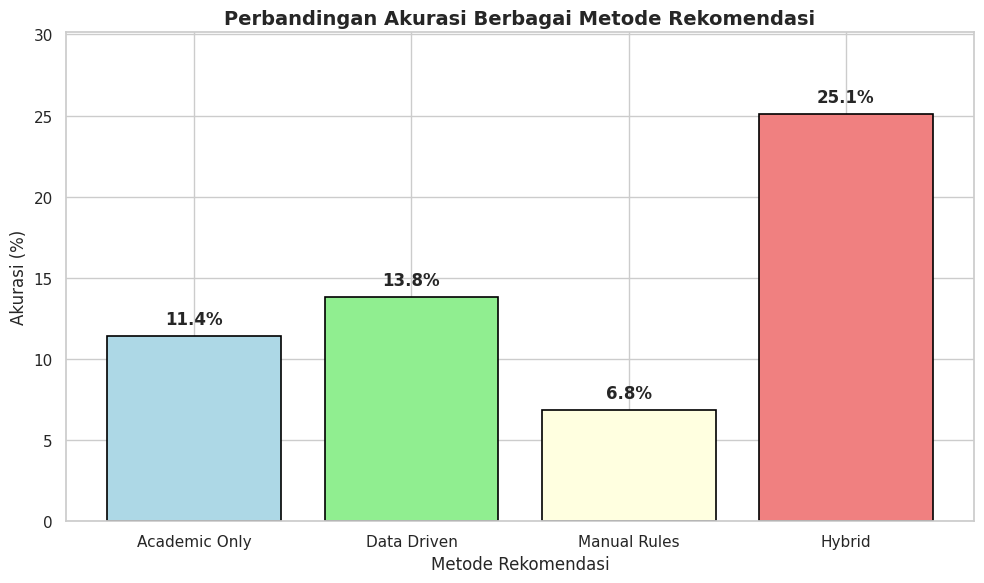

In [17]:
# Hitung berbagai metrik akurasi
academic_only_accuracy = calculate_accuracy('academic_only_recommendations', 'study_field')
data_driven_accuracy = calculate_accuracy('data_driven_recommendations', 'study_field')
manual_accuracy = calculate_accuracy('manual_recommendations', 'study_field')
hybrid_accuracy = calculate_accuracy('top_recommendations', 'study_field')

# Metrik tambahan
total_students = len(df_scaled)
correct_matches_hybrid = (df_scaled['primary_recommendation'] == df_scaled['study_field']).sum()
correct_matches_academic = (df_scaled['academic_only_recommendation'] == df_scaled['study_field']).sum()
same_as_hybrid = (df_scaled['academic_only_recommendation'] == df_scaled['primary_recommendation']).sum()

print("1. AKURASI BERBAGAI METODE:")
print(f"   - Academic-only accuracy: {academic_only_accuracy:.2f}%")
print(f"   - Data-driven accuracy: {data_driven_accuracy:.2f}%")
print(f"   - Manual rule-based accuracy: {manual_accuracy:.2f}%")
print(f"   - Hybrid accuracy: {hybrid_accuracy:.2f}%")

print("\n2. PERBANDINGAN DETAIL:")
print(f"   - Siswa dengan rekomendasi hybrid sesuai aspirasi: {correct_matches_hybrid}/{total_students}")
print(f"   - Siswa dengan rekomendasi academic-only sesuai aspirasi: {correct_matches_academic}/{total_students}")
print(f"   - Rekomendasi hybrid sama dengan academic-only: {same_as_hybrid}/{total_students} ({same_as_hybrid/total_students:.2%})")

print(f"\n3. AKURASI FINAL:")
print(f"   - Hybrid terhadap aspirasi siswa: {hybrid_accuracy:.2f}%")
print(f"   - Academic-only terhadap aspirasi siswa: {academic_only_accuracy:.2f}%")

# Visualisasi hasil evaluasi
methods = ['Academic Only', 'Data Driven', 'Manual Rules', 'Hybrid']
accuracies = [academic_only_accuracy, data_driven_accuracy, manual_accuracy, hybrid_accuracy]

plt.figure(figsize=(10, 6))
bars = plt.bar(methods, accuracies, color=['lightblue', 'lightgreen', 'lightyellow', 'lightcoral'],
               edgecolor='black', linewidth=1.2)
plt.title('Perbandingan Akurasi Berbagai Metode Rekomendasi', fontsize=14, fontweight='bold')
plt.xlabel('Metode Rekomendasi')
plt.ylabel('Akurasi (%)')
plt.ylim(0, max(accuracies) * 1.2)

# Tambahkan nilai akurasi di atas setiap bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{acc:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Visualisasi Heatmap Similarity (untuk presentasi)

Menampilkan kemiripan antara setiap siswa dengan tiap bidang studi dalam bentuk heatmap bisa sangat membantu untuk presentasi:

Note: similarity_df adalah dataframe hasil hybrid similarity. Menampilkan 20 siswa pertama agar plot tetap terbaca.

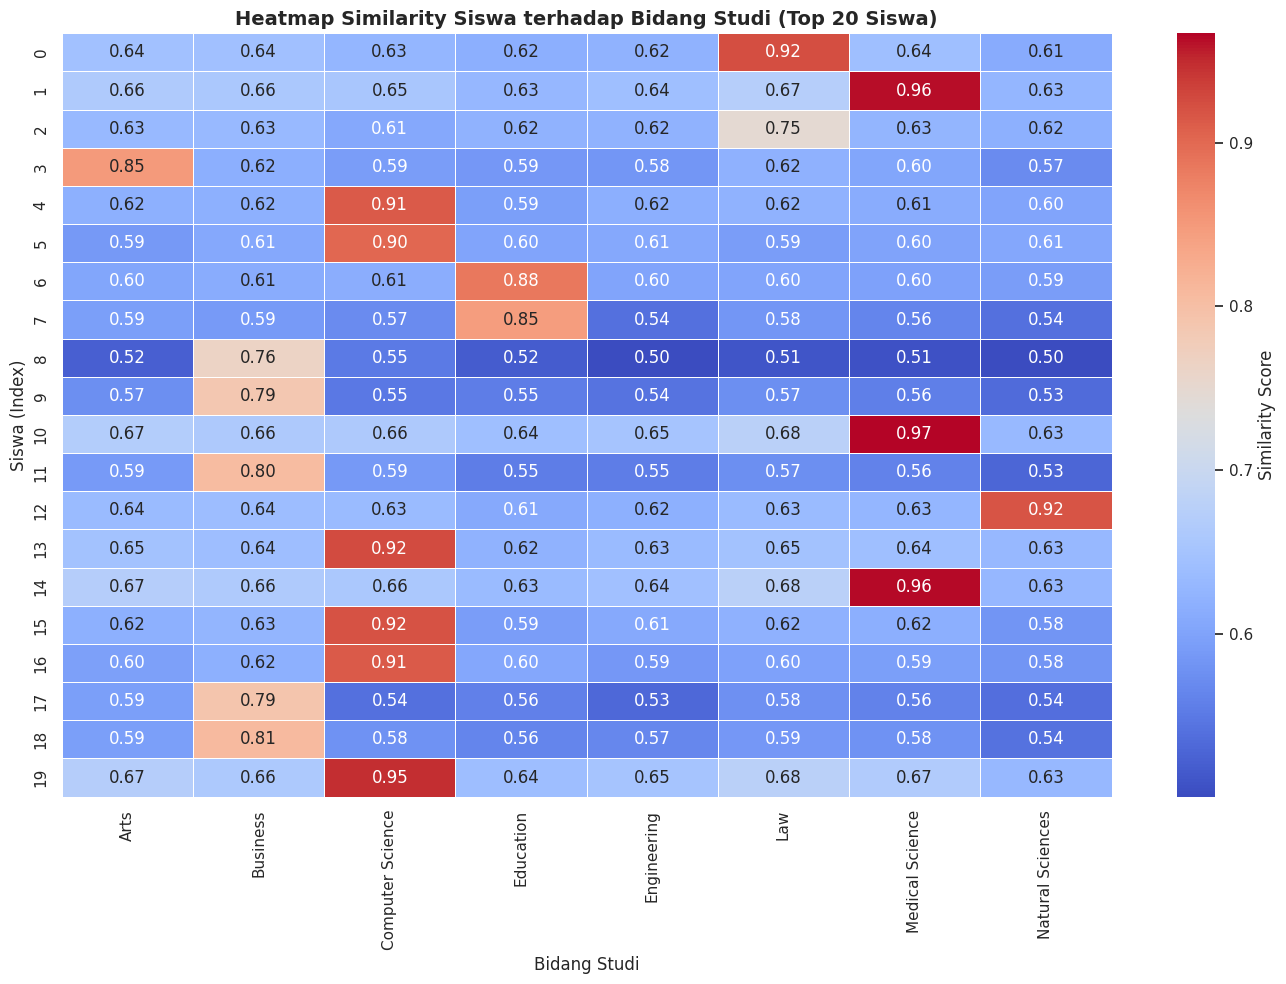

In [18]:
# Heatmap Similarity (Top 20 siswa)
plt.figure(figsize=(14, 10))
similarity_sample = hybrid_similarity_df.iloc[:20]
sns.heatmap(similarity_sample, annot=True, cmap='coolwarm', fmt=".2f",
            cbar_kws={'label': 'Similarity Score'}, linewidths=0.5)
plt.title('Heatmap Similarity Siswa terhadap Bidang Studi (Top 20 Siswa)', fontsize=14, fontweight='bold')
plt.xlabel('Bidang Studi')
plt.ylabel('Siswa (Index)')
plt.tight_layout()
plt.show()

Heatmap menunjukkan bahwa satu siswa bisa punya similarity tinggi ke lebih dari satu bidang studi, dan ini penting untuk menjelaskan kenapa kamu memilih top-N rekomendasi.

## Evaluasi Manual Kecocokan Rekomendasi & Analisis Model

In [19]:
# Output akhir
print("\n=== OUTPUT REKOMENDASI FINAL ===")
final_recommendations = df_scaled[['id', 'name', 'career_aspiration', 'study_field',
                                  'primary_recommendation', 'top_recommendations']]
print(final_recommendations.head(10))

# Contoh detail beberapa siswa
print("\n=== CONTOH DETAIL REKOMENDASI ===")
sample_students = df_scaled[['name', 'career_aspiration', 'study_field',
                           'top_recommendations', 'primary_recommendation']].head(5)

for idx, row in sample_students.iterrows():
    print(f"\n{idx+1}. {row['name']}:")
    print(f"   Aspirasi Karier: {row['career_aspiration']}")
    print(f"   Bidang Studi Actual: {row['study_field']}")
    print(f"   Rekomendasi Top-3: {row['top_recommendations']}")
    print(f"   Primary Recommendation: {row['primary_recommendation']}")
    match_status = "✓ COCOK" if row['primary_recommendation'] == row['study_field'] else "✗ TIDAK COCOK"
    print(f"   Status: {match_status}")

# Analisis fitur terpenting
print("\n=== ANALISIS FITUR TERPENTING PER JURUSAN ===")
feature_importance = {}

for field in data_driven_profiles.index:
    profile = data_driven_profiles.loc[field]
    top_features = profile.nlargest(3)
    feature_importance[field] = list(zip(top_features.index, top_features.values.round(3)))

for field, features in feature_importance.items():
    print(f"\n{field}:")
    for feature, score in features:
        print(f"  - {feature}: {score}")

print(f"\n=== RINGKASAN SISTEM ===")
print(f"Total siswa diproses: {len(df_scaled)}")
print(f"Total bidang studi: {len(all_fields)}")
print(f"Total fitur yang digunakan: {len(feature_columns)}")
print(f"Akurasi tertinggi: {max(accuracies):.2f}% ({methods[accuracies.index(max(accuracies))]})")
print("=== SISTEM REKOMENDASI SELESAI ===")


=== OUTPUT REKOMENDASI FINAL ===
    id               name   career_aspiration       study_field  \
0    1         Paul Casey              Lawyer               Law   
1    2  Danielle Sandoval              Doctor   Medical Science   
2    3       Tina Andrews  Government Officer               Law   
3    4         Tara Clark              Artist              Arts   
6    7      Anthony Smith   Software Engineer  Computer Science   
7    8       George Short   Software Engineer  Computer Science   
9   10     Audrey Simpson             Teacher         Education   
10  11    Gabrielle White             Teacher         Education   
12  13     Patricia Gomez      Business Owner          Business   
13  14     Pamela Jackson      Business Owner          Business   

   primary_recommendation                                top_recommendations  
0                     Law  [(Law, 0.9241), (Arts, 0.6446), (Business, 0.6...  
1         Medical Science  [(Medical Science, 0.9627), (Law, 0.6729), 